<center><h1>A Natural Language Processing pipeline for Twitter</h1></center>

<center><h5>Lucas Viola</h5></center>

<center><h5>University of London</h5></center>

## Summary
#### 1. Aims, objectives and background
1.1 Introduction

1.2 Purpose of this project

1.3 Data Gathering methodology
#### 2. Data
2.1 Data Source

2.2 Data processing

2.2.1 Tokenization

2.2.2 Removing unwanted data

2.2.3 Stemming and Lemmatization

2.2.4 Flattening

2.3 Data limitations
#### 3. Processing Output
3.1 Data Visualization

3.2 Frequency Distribution

3.3 Bigrams, Trigrams and Quadrigrams analysis

3.4 Sentiment Analysis
#### 4. Next Steps
#### 5. Resources and References

## 1. Aims, objectives and background

### 1.1 Introduction

This project presents a Data Pipeline built in Python leveraging the power of tools such as NLTK for Natural Language Processing, Pandas for dealing with different file types, Numpy for statistics and HTTP for data retrieval through the Requests Tool. It aims to be a tool for processing Tweets from different users, analyze them using NLP techniques such as Sentiment Analysis and Frequency Distribution and generate insights and visualizations on top of the results.

### 1.2 Purpose of this project
The purpose of this project is to understand the behavior of Twitter’s users and how they handle themselves exposing their opinions online, the analysis is made on top of parameters such as frequency and classification of Tweets and Words, and the resulting sentiment of positiveness or negativeness of such bodies. It also aims to help visualize the most common words and expressions used by said user.

### 1.3 Data Gathering methodology
Data here is generated through an HTTP GET request to Twitter’s Open API using a OAuth Authentication. It then returns a list of the latest 100 tweets of the chosen user. All processing is made on top of these 100 tweets.

## 2. Data

### 2.1 Data Source
The single source of data is Twitter’s Recent-Search REST API, using as parameter an ID which is generated by querying Twitter’s User API by the user’s handle. It is then transformed into a list of tweets.

#### User Handle Input:
Type the user handle input below

In [71]:
# Add user handle in the variable below. If left blank it will use the default json file containing Elon Musk's Tweets
# as an example
user_handle= 'elonmusk'

# Insert your Twitter API OAuth2 Bearer Token here.
# Learn how to generate yours here: https://developer.twitter.com/en/docs/twitter-api/tweets/lookup/introduction
authToken = ''

In [72]:
# Request to retrieve the user id based on an user's handle
import requests

def get_user_id(handle):
    
    if handle == '':
        return -1
    
    url = 'https://api.twitter.com'
    resource = '/2/users/by/username/'+ handle
    endpoint = url+resource
    
    headers = {'Authorization': 'Bearer '+authToken}

    response = requests.get(endpoint, headers=headers)
    
    print('GET Request to: ', response.url)
    print('Response code: ', response.status_code)
    
    if 'errors' in response.json():
        print('Error making the request')
        return -1
    
    return response.json()['data']['id']

user_id = get_user_id(user_handle)

GET Request to:  https://api.twitter.com/2/users/by/username/elonmusk
Response code:  200


In [73]:
# Request to retrieve the tweets based on an user ID
import requests
import json

# Loading the default dataset from the system
# If an error occurs, will default to this file to analyse
file = open('tweets.json')
default_json = json.loads(file.read())

def get_tweets(user):
    url = 'https://api.twitter.com'
    resource = '/2/users/'+str(user_id)+'/tweets/'
    endpoint = url+resource

    params = {'max_results':100}

    headers = {'Authorization': 'Bearer'+authToken}

    response = requests.get(endpoint, params, headers=headers)
    
    print('GET Request to: ', response.url)
    print('Response code: ', response.status_code)
    
    if response.status_code != 200:
        print('Error making the request. Returning default dataset')
        return default_json
    
    return response.json()

json_dataset = get_tweets(user_id)

json_dataset

GET Request to:  https://api.twitter.com/2/users/44196397/tweets/?max_results=100
Response code:  401
Error making the request. Returning default dataset


{'data': [{'id': '1539375908800368641',
   'text': '@thesheetztweetz Their attempt to bait and switch satellite spectrum for cellular spectrum is super shady and unethical. \n\nIf they are successful, it would hurt the least served and completely unserved of the world. Very messed up.'},
  {'id': '1539325996897292289',
   'text': '@SawyerMerritt Hardly anyone knows this'},
  {'id': '1539293206042578944',
   'text': '@alex_avoigt @WholeMarsBlog Probably only a few months'},
  {'id': '1539292625433501702',
   'text': '@business Twitter me &amp; real-life me are quite different haha! https://t.co/zedimZrthW'},
  {'id': '1539291794436915200',
   'text': '@BloombergLive @Twitter The vote of confidence is much appreciated'},
  {'id': '1539275446625476614', 'text': 'https://t.co/YhpHKcCYXz'},
  {'id': '1539033430876356609',
   'text': '@Degentraland Artificial Insemination?'},
  {'id': '1539031248638812160',
   'text': 'AI gets better every day https://t.co/Lz5XfXRJjh'},
  {'id': '15389988654

The resulting JSON is then transformed into a list of tweets in the string format which will then be cleaned, processed and analyzed.

In [74]:
# Creating a list of tweets based in the json

tweets_list = []

for element in json_dataset['data']:
    tweets_list.append(element['text'])

print('List of tweets: ', len(tweets_list))

List of tweets:  100


### 2.2 Data processing
After retrieving the list of tweets, the notebook takes a few steps in order to prepare the data to be analyzed. Being them:

### 2.2.1 Dataset Tokenization
The first step of the pipeline is to tokenize each tweet in its own list of words in order to generate the first of the two basic data structures we will deal with during the whole process.

In [75]:
# Using NLTK to transform the list of tweets into tokens that can be later analyzed and classified

from nltk.tokenize import word_tokenize, sent_tokenize

# Defining a function to use word_tokenize to tokenize elements in a dataset
def tokenize(list_data):
    tokens = []
    
    for element in list_data:
        words = word_tokenize(element)
        tokens.append(words)
    
    return tokens

tokens = tokenize(tweets_list)
print('List of tokens: ', len(tweets_list))
print('\n Showing the first 2 tweets as tokens: ', tokens[:2])

List of tokens:  100

 Showing the first 2 tweets as tokens:  [['@', 'thesheetztweetz', 'Their', 'attempt', 'to', 'bait', 'and', 'switch', 'satellite', 'spectrum', 'for', 'cellular', 'spectrum', 'is', 'super', 'shady', 'and', 'unethical', '.', 'If', 'they', 'are', 'successful', ',', 'it', 'would', 'hurt', 'the', 'least', 'served', 'and', 'completely', 'unserved', 'of', 'the', 'world', '.', 'Very', 'messed', 'up', '.'], ['@', 'SawyerMerritt', 'Hardly', 'anyone', 'knows', 'this']]


### 2.2.2 Removing unwanted data
After we have the list of tokens, we then use the stopwords corpora from NLTK in order to remove stopwords (such as ‘and’, ‘or’, ‘it’) as we do not want these common connection words to interfere in our analysis. We will also remove the punctuation so the only thing we have left is a clean list of words.


#### Removing the punctuation

In [76]:
# Removing the punctuation in order to clean the data

# Defining a function to remove punctuation from the wdataset
def remove_punctuation(data):
    tokens_with_no_punctuation = []
    for t in data:
        clean = [word for word in t if word.isalpha()]
        tokens_with_no_punctuation.append(clean)

    return tokens_with_no_punctuation

no_punctuation_tokens = remove_punctuation(tokens)
no_punctuation_tokens[:3][:3]

[['thesheetztweetz',
  'Their',
  'attempt',
  'to',
  'bait',
  'and',
  'switch',
  'satellite',
  'spectrum',
  'for',
  'cellular',
  'spectrum',
  'is',
  'super',
  'shady',
  'and',
  'unethical',
  'If',
  'they',
  'are',
  'successful',
  'it',
  'would',
  'hurt',
  'the',
  'least',
  'served',
  'and',
  'completely',
  'unserved',
  'of',
  'the',
  'world',
  'Very',
  'messed',
  'up'],
 ['SawyerMerritt', 'Hardly', 'anyone', 'knows', 'this'],
 ['WholeMarsBlog', 'Probably', 'only', 'a', 'few', 'months']]

#### Removing the stopwords 

In [77]:
# Removing the stopwords 
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Defining a function to remove stopwords based on a language
def remove_stopwords(data, language="portuguese"):
    stop_words = stopwords.words(language)

    tokens_without_stopwords = []
    for token in data:
        clean_token = [word for word in token if not word in stop_words]
        tokens_without_stopwords.append(clean_token)

    return tokens_without_stopwords

# Removing stopwords from the tokens
no_stopwords = remove_stopwords(no_punctuation_tokens, "portuguese")
no_stopwords_final = remove_stopwords(no_stopwords, "english")

print('Tokens Length: ', len(no_stopwords_final))
print('\nTokens with no stopwords:', no_stopwords_final)

Tokens Length:  100

Tokens with no stopwords: [['thesheetztweetz', 'Their', 'attempt', 'bait', 'switch', 'satellite', 'spectrum', 'cellular', 'spectrum', 'super', 'shady', 'unethical', 'If', 'successful', 'would', 'hurt', 'least', 'served', 'completely', 'unserved', 'world', 'Very', 'messed'], ['SawyerMerritt', 'Hardly', 'anyone', 'knows'], ['WholeMarsBlog', 'Probably', 'months'], ['business', 'Twitter', 'amp', 'quite', 'different', 'haha', 'https'], ['BloombergLive', 'Twitter', 'The', 'vote', 'confidence', 'much', 'appreciated'], ['https'], ['Degentraland', 'Artificial', 'Insemination'], ['AI', 'gets', 'better', 'every', 'day', 'https'], ['Some', 'great', 'suggestions', 'comments'], ['But', 'sometimes', 'stock', 'https'], ['marenkahnert', 'That', 'largest', 'wheel', 'cheese', 'Beverly', 'Hills', 'Cheese', 'Shop'], ['teslaownersSV', 'I', 'love', 'many', 'cheeses', 'hard', 'say', 'particular', 'one', 'best', 'maybe', 'Stilton'], ['The', 'sheer', 'variety', 'cheese', 'amazing'], ['What'

[nltk_data] Downloading package stopwords to /Users/lucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.2.3 Stemming and Lemmatization
In order to have a better result for the Frequency Distribution graphs, NLTK’s Stem library was applied using the Porter Stemmer algorithm to reduce the words to their roots. Porter Stemmer was chosen for this task due to the fact it is the less intrusive of the Stemming Algorithms. After stemming the list, WordNetLemmatizer was also used to lemmatize it as a second approach.


#### Stemming

In [78]:
# Stemming the tokens using PorterStemmer
from nltk.stem import PorterStemmer, LancasterStemmer

def stem_tokens(tokens):    
    stemmed_tokens = []
    
    ps = PorterStemmer()
    
    for t in tokens:
        cleaned = [ps.stem(word) for word in t]
        stemmed_tokens.append(cleaned)
    
    return stemmed_tokens;

stemmed_tokens = stem_tokens(no_stopwords_final)

print('Tokens Length: ', len(stemmed_tokens))
print('\nStemmed Tokens:', stemmed_tokens)

Tokens Length:  100

Stemmed Tokens: [['thesheetztweetz', 'their', 'attempt', 'bait', 'switch', 'satellit', 'spectrum', 'cellular', 'spectrum', 'super', 'shadi', 'uneth', 'if', 'success', 'would', 'hurt', 'least', 'serv', 'complet', 'unserv', 'world', 'veri', 'mess'], ['sawyermerritt', 'hardli', 'anyon', 'know'], ['wholemarsblog', 'probabl', 'month'], ['busi', 'twitter', 'amp', 'quit', 'differ', 'haha', 'http'], ['bloombergl', 'twitter', 'the', 'vote', 'confid', 'much', 'appreci'], ['http'], ['degentraland', 'artifici', 'insemin'], ['ai', 'get', 'better', 'everi', 'day', 'http'], ['some', 'great', 'suggest', 'comment'], ['but', 'sometim', 'stock', 'http'], ['marenkahnert', 'that', 'largest', 'wheel', 'chees', 'beverli', 'hill', 'chees', 'shop'], ['teslaownerssv', 'i', 'love', 'mani', 'chees', 'hard', 'say', 'particular', 'one', 'best', 'mayb', 'stilton'], ['the', 'sheer', 'varieti', 'chees', 'amaz'], ['what', 'favorit', 'chees'], ['teslaownerssv', 'cgi', 'irl'], ['trend', 'empti'], ['w

#### Lemmatization

In [79]:
# Lemmatization on top of the list of tweets
from nltk.stem import WordNetLemmatizer

def lemmatize_tokens(tokens):
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []

    for t in tokens:
        cleaned = [lemmatizer.lemmatize(word) for word in t]
        lemmatized_tokens.append(cleaned)
    
    return lemmatized_tokens

lemmatized_tokens = lemmatize_tokens(stemmed_tokens)
print('The first 10 tweets after lemmatization: ', lemmatized_tokens[:10])

The first 10 tweets after lemmatization:  [['thesheetztweetz', 'their', 'attempt', 'bait', 'switch', 'satellit', 'spectrum', 'cellular', 'spectrum', 'super', 'shadi', 'uneth', 'if', 'success', 'would', 'hurt', 'least', 'serv', 'complet', 'unserv', 'world', 'veri', 'mess'], ['sawyermerritt', 'hardli', 'anyon', 'know'], ['wholemarsblog', 'probabl', 'month'], ['busi', 'twitter', 'amp', 'quit', 'differ', 'haha', 'http'], ['bloombergl', 'twitter', 'the', 'vote', 'confid', 'much', 'appreci'], ['http'], ['degentraland', 'artifici', 'insemin'], ['ai', 'get', 'better', 'everi', 'day', 'http'], ['some', 'great', 'suggest', 'comment'], ['but', 'sometim', 'stock', 'http']]


### 2.2.4 Flattening
After our data is clean and concise, we then flatten the list of tweets in order to generate the second data structure we will deal with: a list containing all the words in the dataset.


In [80]:
# Flattening the clean list

tokens_with_lem_stem = []
for word in lemmatized_tokens:
    tokens_with_lem_stem += word

print(tokens_with_lem_stem[:50])
print("\nNumber of tokens:", len(tokens_with_lem_stem))

['thesheetztweetz', 'their', 'attempt', 'bait', 'switch', 'satellit', 'spectrum', 'cellular', 'spectrum', 'super', 'shadi', 'uneth', 'if', 'success', 'would', 'hurt', 'least', 'serv', 'complet', 'unserv', 'world', 'veri', 'mess', 'sawyermerritt', 'hardli', 'anyon', 'know', 'wholemarsblog', 'probabl', 'month', 'busi', 'twitter', 'amp', 'quit', 'differ', 'haha', 'http', 'bloombergl', 'twitter', 'the', 'vote', 'confid', 'much', 'appreci', 'http', 'degentraland', 'artifici', 'insemin', 'ai', 'get']

Number of tokens: 525


### 2.3 Data limitations
Due to Twitter’s API limitations, the maximum number of Tweets we can collect is 100. This of course limits the exploration we can do on this dataset as a higher number would generate better insights. There are a few workarounds on this limitations (such as exploring the API’s Pagination tool) which will be considered for an extension on this research. As per now only 100 tweets can be processed, though.


## 3. Processing Output


### 3.1 Data Visualization
In order to better visualize the data we are dealing with, Wordcloud and Matplotlib were used to plot a word cloud view based on the words and the colors of Twitter. At this step it is already possible to gather a few insights on the content of the dataset, such as the words who appear the most in the user’s twitters.

Two word clouds were plotted:
* One based on the clean list of words
* One based on the stemmed and lemmatized list of words


### Creating the Word Cloud

In [81]:
# Using WordCloud here to create a wordcloud for all the words in the dataset
# Using matplotlib to display the world cloud image
import matplotlib.pyplot as plt
import numpy as np
import os
import wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

def create_wordcloud(dataset, wordcloud):
    # Get Image Path
    image_path = path.join(os.getcwd(), "twitter.jpeg")

    # Open the image using PIL.Image to generate the color mask
    color_mask = np.array(Image.open(image_path))

    wordcloud = WordCloud(background_color="black", max_font_size=70, mask=color_mask).generate(dataset)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Word cloud for the tokens with no lemmatization and stemming:


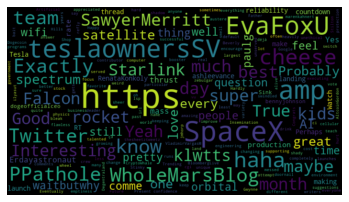

In [82]:
# Creating a wordcloud for the tokens before lemmatization and stemming so we can see the complete words
tokens_without_lem_stem = []
for word in no_stopwords_final:
    tokens_without_lem_stem += word
    
print('Word cloud for the tokens with no lemmatization and stemming:')
create_wordcloud(' '.join(tokens_without_lem_stem), wordcloud)

Word cloud for the Stemmed & Lemmatized tokens:


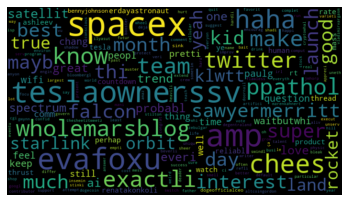

In [83]:
# Creating a wordcloud for the tokens after lemmatization and stemming
print('Word cloud for the Stemmed & Lemmatized tokens:')
create_wordcloud(' '.join(tokens_with_lem_stem), wordcloud)

## 3.2 Frequency Distribution

To understand more about the words used most frequently by the User two Graphs were plotted:
A distribution of Words over 100 tokens.
The frequency of the top 10 most common words over the whole dataset.

NLTK.freqDist was used in order to generate both these graphs.

### Counting the frequency distribution

In [84]:
# Defining a function to plot the frequency distribution on top of a list of words
def plot_frequency_distribution(x, title=""):
    # Get freq distribution of tokens
    f = nltk.FreqDist(x)
    
    # Plot freq dist
    plt.figure(figsize=(20,3))
    
    plt.title(title)
    f.plot()

### Distribution of words over 100 tokens

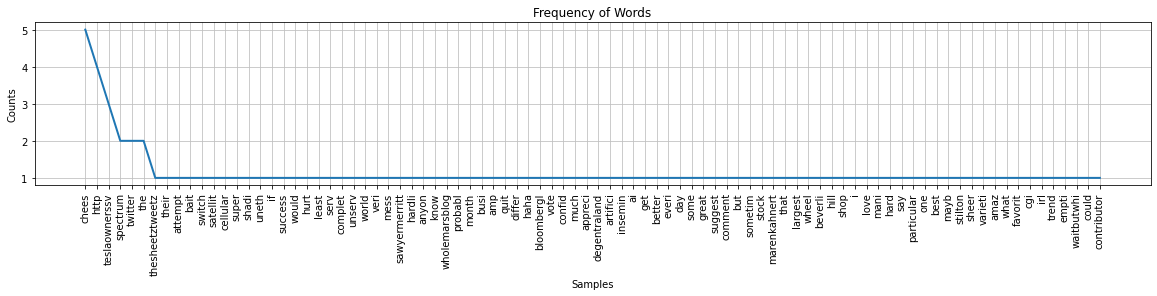

In [85]:
# Frequency of words over 100 tokens
plot_frequency_distribution(tokens_with_lem_stem[:100], "Frequency of Words")

### Frequency of the 10 most common words

In [86]:
# Frequency of most common words over the whole token set
freq_dist_tokens = nltk.FreqDist(tokens_without_lem_stem)


freq_dist_tokens.most_common()

print('Frequency of 10 most common words in the whole token set:\n')
freq_dist_tokens.tabulate(10)

Frequency of 10 most common words in the whole token set:

        https             I        SpaceX           amp teslaownersSV       EvaFoxU           The WholeMarsBlog       Twitter          team 
           14            11             9             8             7             7             5             4             4             4 


## 3.2 Bigrams, Trigrams and Quadrigrams analysis

NLTK’s collocations package was used in order to find the 20 most common words that were frequently used together for Bigrams, Trigrams and Quadrigrams. This analysis provides a more contextual analysis on the user’s tweets. By looking at the results we can understand more about the subjects of interest of the User and a big picture view on the user’s sentiment on these subjects.

### 20 Most Common Bigrams

In [87]:
bigrams = nltk.collocations.BigramCollocationFinder.from_words(tokens_without_lem_stem)

bigrams.ngram_fd.most_common(20)

[(('haha', 'https'), 2),
 (('I', 'love'), 2),
 (('thrust', 'amp'), 2),
 (('production', 'rate'), 2),
 (('Tesla', 'SpaceX'), 2),
 (('team', 'making'), 2),
 (('RT', 'SpaceX'), 2),
 (('Good', 'thread'), 2),
 (('thesheetztweetz', 'Their'), 1),
 (('Their', 'attempt'), 1),
 (('attempt', 'bait'), 1),
 (('bait', 'switch'), 1),
 (('switch', 'satellite'), 1),
 (('satellite', 'spectrum'), 1),
 (('spectrum', 'cellular'), 1),
 (('cellular', 'spectrum'), 1),
 (('spectrum', 'super'), 1),
 (('super', 'shady'), 1),
 (('shady', 'unethical'), 1),
 (('unethical', 'If'), 1)]

### 20 Most Common Trigrams

In [88]:
trigrams = nltk.collocations.TrigramCollocationFinder.from_words(tokens_without_lem_stem)

trigrams.ngram_fd.most_common(20)

[(('thesheetztweetz', 'Their', 'attempt'), 1),
 (('Their', 'attempt', 'bait'), 1),
 (('attempt', 'bait', 'switch'), 1),
 (('bait', 'switch', 'satellite'), 1),
 (('switch', 'satellite', 'spectrum'), 1),
 (('satellite', 'spectrum', 'cellular'), 1),
 (('spectrum', 'cellular', 'spectrum'), 1),
 (('cellular', 'spectrum', 'super'), 1),
 (('spectrum', 'super', 'shady'), 1),
 (('super', 'shady', 'unethical'), 1),
 (('shady', 'unethical', 'If'), 1),
 (('unethical', 'If', 'successful'), 1),
 (('If', 'successful', 'would'), 1),
 (('successful', 'would', 'hurt'), 1),
 (('would', 'hurt', 'least'), 1),
 (('hurt', 'least', 'served'), 1),
 (('least', 'served', 'completely'), 1),
 (('served', 'completely', 'unserved'), 1),
 (('completely', 'unserved', 'world'), 1),
 (('unserved', 'world', 'Very'), 1)]

### 20 Most Common Quadgrams

In [89]:
quadgrams = nltk.collocations.QuadgramCollocationFinder.from_words(tokens_without_lem_stem)

quadgrams.ngram_fd.most_common(20)

[(('thesheetztweetz', 'Their', 'attempt', 'bait'), 1),
 (('Their', 'attempt', 'bait', 'switch'), 1),
 (('attempt', 'bait', 'switch', 'satellite'), 1),
 (('bait', 'switch', 'satellite', 'spectrum'), 1),
 (('switch', 'satellite', 'spectrum', 'cellular'), 1),
 (('satellite', 'spectrum', 'cellular', 'spectrum'), 1),
 (('spectrum', 'cellular', 'spectrum', 'super'), 1),
 (('cellular', 'spectrum', 'super', 'shady'), 1),
 (('spectrum', 'super', 'shady', 'unethical'), 1),
 (('super', 'shady', 'unethical', 'If'), 1),
 (('shady', 'unethical', 'If', 'successful'), 1),
 (('unethical', 'If', 'successful', 'would'), 1),
 (('If', 'successful', 'would', 'hurt'), 1),
 (('successful', 'would', 'hurt', 'least'), 1),
 (('would', 'hurt', 'least', 'served'), 1),
 (('hurt', 'least', 'served', 'completely'), 1),
 (('least', 'served', 'completely', 'unserved'), 1),
 (('served', 'completely', 'unserved', 'world'), 1),
 (('completely', 'unserved', 'world', 'Very'), 1),
 (('unserved', 'world', 'Very', 'messed'), 1

## 3.3 Sentiment Analysis

To finish the analysis I used NLTK’s Vader pre-trained lexicon to analyze the compound positiveness and negativeness index for each of the User’s Tweets. A CSV file is then generated using containing three columns: The tweet, the compound score and the final result for the sentiment analysis.

## Vader

In [90]:
# Analyzing if tweet is positive or negative using VADER's Sentiment Analyzer
from random import shuffle
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_polarity_score(tweet: str) -> bool:
    return sia.polarity_scores(tweet)

     
analysis_result_json = []
dict = {}
for tweet in tweets_list:
    
    sentiment = 'POSITIVE' if get_polarity_score(tweet)["compound"] > 0 else 'NEGATIVE'
    compound = get_polarity_score(tweet)["compound"]
    
    tweet_sentiment_dictionary = {
        "Tweet": tweet,
        "Compound Score": compound,
        "Sentiment": sentiment
    }
    analysis_result_json.append(tweet_sentiment_dictionary)

analysis_result_json

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lucas/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[{'Tweet': '@thesheetztweetz Their attempt to bait and switch satellite spectrum for cellular spectrum is super shady and unethical. \n\nIf they are successful, it would hurt the least served and completely unserved of the world. Very messed up.',
  'Compound Score': -0.1761,
  'Sentiment': 'NEGATIVE'},
 {'Tweet': '@SawyerMerritt Hardly anyone knows this',
  'Compound Score': 0.0,
  'Sentiment': 'NEGATIVE'},
 {'Tweet': '@alex_avoigt @WholeMarsBlog Probably only a few months',
  'Compound Score': 0.0,
  'Sentiment': 'NEGATIVE'},
 {'Tweet': '@business Twitter me &amp; real-life me are quite different haha! https://t.co/zedimZrthW',
  'Compound Score': 0.553,
  'Sentiment': 'POSITIVE'},
 {'Tweet': '@BloombergLive @Twitter The vote of confidence is much appreciated',
  'Compound Score': 0.765,
  'Sentiment': 'POSITIVE'},
 {'Tweet': 'https://t.co/YhpHKcCYXz',
  'Compound Score': 0.0,
  'Sentiment': 'NEGATIVE'},
 {'Tweet': '@Degentraland Artificial Insemination?',
  'Compound Score': 0.0,
  

In [91]:
# Generating a csv file with the scores of the sentiment analysis

import numpy as np
import pandas as pd

# Generating a data frame table getting specific information
analysis_dataframe = pd.DataFrame(analysis_result_json, columns=["Tweet", "Compound Score", "Sentiment"])

# Saving the CSV with all the content
analysis_dataframe.to_csv('sentiment_analysis_'+user_handle+'.csv')

analysis_dataframe

,Tweet,Compound Score,Sentiment
0,@thesheetztweetz Their attempt to bait and swi...,-0.1761,NEGATIVE
1,@SawyerMerritt Hardly anyone knows this,0.0000,NEGATIVE
2,@alex_avoigt @WholeMarsBlog Probably only a fe...,0.0000,NEGATIVE
3,@business Twitter me &amp; real-life me are qu...,0.5530,POSITIVE
4,@BloombergLive @Twitter The vote of confidence...,0.7650,POSITIVE
...,...,...,...
95,@joeydillon The Austin airport needs to be upg...,0.0000,NEGATIVE
96,@PPathole @teslaownersSV Have kids!,0.0000,NEGATIVE
97,@BillyM2k @dogeofficialceo 🤣🤣,0.0000,NEGATIVE
98,@BillyM2k Haha 💯,0.4588,POSITIVE


## 4. Next Steps
A few ideas are being considered here as next steps fo the this NLP Data Processing pipeline:
Explore more than 100 tweets (break API limit)
As mentioned previously, due to Twitter’s API Limitation we can only grab the latest 100 tweets. Historical searching is only allowed with a specific Researcher License available only for MSc. and PhD students. Twitter has, however, a Pagination tool which I will try to explore in order to improve the dataset.

#### 1. Explore more than 100 tweets (break API limit)
As mentioned previously, due to Twitter’s API Limitation we can only grab the latest 100 tweets. Historical searching is only allowed with a specific Researcher License available only for MSc. and PhD students. Twitter has, however, a Pagination tool which I will try to explore in order to improve the dataset.

#### 2. Expand on NLP & Sentiment Analysis
I only analyzed the positiveness and negativeness of tweets. I intend to do other possible analysis such as applying a Classification Algorithm to classify the tweets/words into categories. Or training my own Model instead of using a pre-trained one.

#### 3. Add more information to the CSV with results
During the analysis, a lot of insights were gathered, however only the Sentiment Analysis was contemplated in the final CSV file that was generated. I intend to put more columns with more insights in this file.

## 5. References and Resources

[1] Twitter’s REST API Documentation: 
https://developer.twitter.com/en/docs/twitter-api/tweets/timelines/api-reference/get-users-id-tweets

[2] NLTK:
https://www.nltk.org/

[3] Word Cloud:
http://amueller.github.io/word_cloud

[4] MatplotLib:
https://matplotlib.org/

[5] Pandas:
https://pandas.pydata.org/

[6] Beri. A. Sentimental Analysis Using Vader: https://towardsdatascience.com/sentimental-analysis-using-vader. 
May 27, 2020

[7] Mogyorosi, Marius. Sentiment Analysis: First Steps With Python's NLTK Library:
https://realpython.com/python-nltk-sentiment-analysis/

[8]Building a Classification Model with NLTK:
https://www.nltk.org/api/nltk.classify.naivebayes.html https://www.nltk.org/api/nltk.classify.html

[9] Dadvar, M.J & Hauf, C. & De Jong. F. VADER: Scope of Negation Detection in Sentiment Analysis. University of Twente.

[10] Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

[11] NumPy:
https://numpy.org/